In [1]:
source('source.r')

Packages Loaded:
ncdf4 R.matlab openxlsx RColorBrewer compiler lattice geosphere readxl data.table rworldmap


Loading required package: ncdf4
Loading required package: R.matlab
Warning message:
"package 'R.matlab' was built under R version 3.4.2"R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: 'R.matlab'

The following objects are masked from 'package:base':

    getOption, isOpen

Loading required package: openxlsx
Loading required package: RColorBrewer
Loading required package: compiler
Loading required package: lattice
Loading required package: geosphere
Warning message:
"package 'geosphere' was built under R version 3.4.2"Loading required package: readxl
Loading required package: data.table
Loading required package: rworldmap
Warning message:
"package 'rworldmap' was built under R version 3.4.3"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.4.2"### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')


In [6]:
ctd = read.xlsx('Raw Data/CTD/DataZoo - P1706 CTD Downcast Data.xlsx')
ctd$Time = conv_excel_time(ctd$DateTime_GMT, tz = 'UTC')

ctd.log = read.xlsx('Raw Data/CTD/DataZoo - P1706 CTD Cast Log.xlsx', sheet='Data')

#ship.log = read.xlsx('Raw Data/CCEP1706 Event Log.xlsx')

str(ctd)
str(ctd.log)
#str(ship.log)

'data.frame':	41780 obs. of  35 variables:
 $ Cruise      : chr  "CCE-P1706" "CCE-P1706" "CCE-P1706" "CCE-P1706" ...
 $ Cycle       : chr  "Cycle0" "Cycle0" "Cycle0" "Cycle0" ...
 $ EventNo     : num  3 3 3 3 3 3 3 3 3 3 ...
 $ Cast        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ DateTime_GMT: num  42888 42888 42888 42888 42888 ...
 $ Direction   : chr  "down" "down" "down" "down" ...
 $ Pressure    : num  2 3 4 5 6 7 8 9 10 11 ...
 $ Depth       : num  1.99 2.98 3.97 4.96 5.96 ...
 $ T090C       : num  16.9 16.8 16.9 16.9 16.8 ...
 $ T190C       : num  16.8 16.8 16.9 16.9 16.8 ...
 $ Cond1       : num  4.3 4.29 4.3 4.3 4.29 ...
 $ Cond2       : num  4.29 4.29 4.3 4.3 4.3 ...
 $ Sal00       : num  33.4 33.4 33.4 33.4 33.4 ...
 $ Sal11       : num  33.4 33.4 33.4 33.4 33.4 ...
 $ OxymicroM   : num  195 196 195 195 195 ...
 $ OxyPerSat   : num  81 81.1 81 80.9 80.8 ...
 $ SurPAR      : num  8632 8632 8632 8632 8632 ...
 $ PAR         : num  1292 1053 887 775 688 ...
 $ Cpar        : num  0.1496

In [62]:
plot.cycle = function(cycle = 'Cycle0') {
    l = which(ctd$Cycle == cycle)
    plot(ctd$Sal00[l], ctd$Depth[l], pch=20, cex=0.8, col='#00000090', ylim=c(100,0), ylab='Depth',
         xaxs='i', yaxs='i', main=cycle, xlab='Fluor', xlim = c(32.8,34.1))
}
unique(ctd$Cycle)

[1] "Cycle0"    "Transect1" "Cycle1"    "Cycle2"    "Transect2" "Cycle3"   
 [7] "Transect3" "Cycle4"    "BBL"       "TransComp"

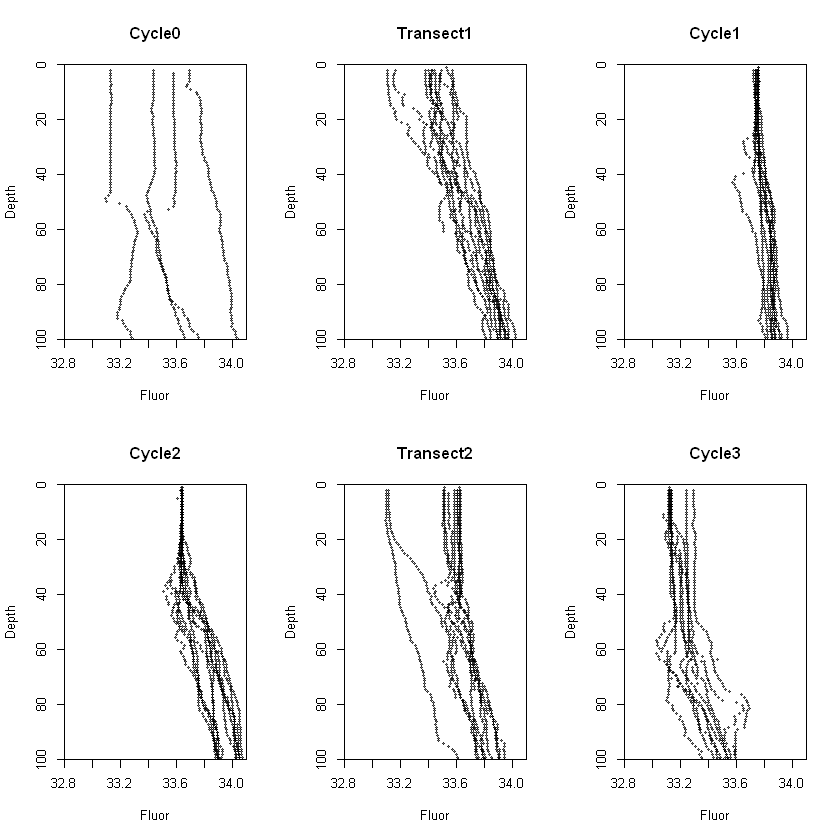

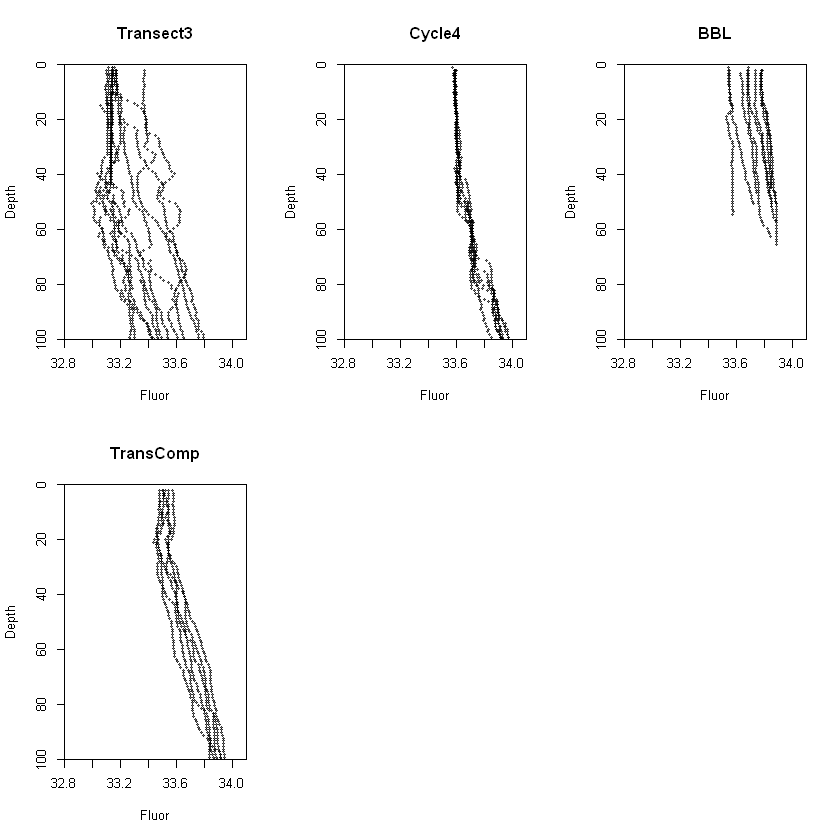

In [65]:
#pdf('Output/CTD/CTD Module - Summary of Sal Profiles per Cycle.pdf')

par(mfrow=c(2,3))
for (i in unique(ctd$Cycle)) {
    plot.cycle(i)
}

#dev.off()